# Load data

In [2]:
import yfinance as yf
df = yf.Ticker("006208.TW").history(period = "10y")
df #檢查用

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2014-04-15 00:00:00+08:00,25.250618,25.257866,25.207119,25.207119,70000,0.0,0.0,0.0
2014-04-16 00:00:00+08:00,25.156368,25.221615,25.156368,25.221615,3000,0.0,0.0,0.0
2014-04-17 00:00:00+08:00,25.170865,25.192614,25.163614,25.192614,90000,0.0,0.0,0.0
2014-04-18 00:00:00+08:00,25.257863,25.308611,25.257863,25.308611,6000,0.0,0.0,0.0
2014-04-21 00:00:00+08:00,25.272363,25.330359,25.272363,25.330359,7000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-04-09 00:00:00+08:00,93.300003,95.449997,93.300003,95.449997,4059945,0.0,0.0,0.0
2024-04-10 00:00:00+08:00,95.449997,95.500000,95.000000,95.349998,2959208,0.0,0.0,0.0
2024-04-11 00:00:00+08:00,94.800003,95.000000,94.400002,94.949997,4120034,0.0,0.0,0.0


#  Filter Data

In [3]:
df = df.filter(["Close"]) # 過濾需要的Topic
df = df.rename(columns = {"Close": "RealValue"})
df #檢查用

,RealValue
Date,
2014-04-15 00:00:00+08:00,25.207119
2014-04-16 00:00:00+08:00,25.221615
2014-04-17 00:00:00+08:00,25.192614
2014-04-18 00:00:00+08:00,25.308611
2014-04-21 00:00:00+08:00,25.330359
...,...
2024-04-09 00:00:00+08:00,95.449997
2024-04-10 00:00:00+08:00,95.349998
2024-04-11 00:00:00+08:00,94.949997


# Visualize data
check the style packages in the list

In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


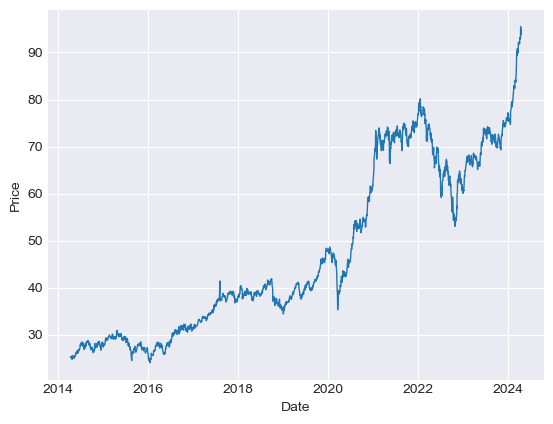

In [5]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df["RealValue"], linewidth = 1)
plt.show()

# Standardize

In [6]:
from sklearn.preprocessing import MinMaxScaler

# 把數據按比例縮小至0~1範圍
scaler=MinMaxScaler(feature_range = (0, 1))
scaled_prices=scaler.fit_transform(df.values)
scaled_prices

array([[0.01602392],
       [0.01622698],
       [0.01582073],
       ...,
       [0.9929959 ],
       [0.99089476],
       [0.97688656]])

# Construct datasets

In [7]:
import numpy as np
MOVING_WIN_SIZE = 60 #設定天數

all_x, all_y = [], []
for i in range(len(scaled_prices)-MOVING_WIN_SIZE):
    x=scaled_prices[i:i+MOVING_WIN_SIZE]
    y=scaled_prices[i+MOVING_WIN_SIZE]
    all_x.append(x)
    all_y.append(y)

all_x, all_y = np.array(all_x), np.array(all_y) # data type: python list => numpy array

In [8]:
all_x.shape

(2379, 60, 1)

In [9]:
all_y.shape

(2379, 1)

# Split dataset

In [10]:
DS_SPLIT =0.8
train_ds_size = round(all_x.shape[0] * DS_SPLIT)
train_x, train_y=all_x[:train_ds_size], all_y[:train_ds_size]
test_x, test_y=all_x[train_ds_size:], all_y[train_ds_size:]

In [11]:
train_x.shape

(1903, 60, 1)

In [12]:
train_y.shape

(1903, 1)

In [13]:
test_x.shape

(476, 60, 1)

In [14]:
test_y.shape

(476, 1)

# Construct model

In [15]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(
    units=50,
    return_sequences=True,
    input_shape=(train_x.shape[1],1
)))

model.add(LSTM(
    units=50,
    return_sequences=False
))

model.add(Dense(
    units=25
))

model.add(Dense(
    units=1
))

model.summary()

d:\Program\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer="adam", loss="mean_squared_error")

# Train Model

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

callback=EarlyStopping(monitor = "val_loss", patience=10, restore_best_weights = True)
train_history = model.fit(
    train_x,
    train_y,
    validation_split=0.2,
    callbacks=[callback],
    epochs=1000
)

Epoch 1/1000


48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0071 - val_loss: 0.0010
Epoch 2/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.1231e-04 - val_loss: 6.0616e-04
Epoch 3/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.7350e-04 - val_loss: 5.5958e-04
Epoch 4/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.5681e-04 - val_loss: 7.7310e-04
Epoch 5/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.5731e-04 - val_loss: 5.2485e-04
Epoch 6/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.6016e-04 - val_loss: 4.9591e-04
Epoch 7/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.7354e-04 - val_loss: 5.8786e-04
Epoch 8/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.3751e-04 - val_loss: 4.3643e-04
Epoch 9/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.2068e-04 - val_loss: 4.6932e-04
Epoch 10/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.2143e-04 - val_loss: 6.2830e-04
Epoch 11/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 9.2022e-

# Evaluate Model

In [18]:
predicts = model.predict(test_x)
predicts

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


array([[0.6180742 ],
       [0.6360688 ],
       [0.6322856 ],
       [0.6305845 ],
       [0.639763  ],
       [0.62419087],
       [0.6014605 ],
       [0.59472144],
       [0.5972877 ],
       [0.5791336 ],
       [0.583375  ],
       [0.59194   ],
       [0.6043105 ],
       [0.6170067 ],
       [0.6023648 ],
       [0.6045847 ],
       [0.6086644 ],
       [0.59833544],
       [0.60118204],
       [0.59303194],
       [0.6104645 ],
       [0.6384981 ],
       [0.6514406 ],
       [0.6484439 ],
       [0.6345221 ],
       [0.63611037],
       [0.62743384],
       [0.63638675],
       [0.6375454 ],
       [0.6291947 ],
       [0.60070556],
       [0.59258336],
       [0.5895679 ],
       [0.5889609 ],
       [0.58021384],
       [0.568159  ],
       [0.58177084],
       [0.57007277],
       [0.5523772 ],
       [0.5509596 ],
       [0.5723526 ],
       [0.57405233],
       [0.562822  ],
       [0.53920054],
       [0.50525904],
       [0.4891163 ],
       [0.49669424],
       [0.491

In [19]:
predicts=scaler.inverse_transform(predicts)
predicts

array([[68.18555 ],
       [69.47012 ],
       [69.20005 ],
       [69.07861 ],
       [69.73384 ],
       [68.6222  ],
       [66.99955 ],
       [66.51847 ],
       [66.70167 ],
       [65.40571 ],
       [65.70848 ],
       [66.31991 ],
       [67.203   ],
       [68.109344],
       [67.0641  ],
       [67.22257 ],
       [67.51381 ],
       [66.77646 ],
       [66.97967 ],
       [66.39786 ],
       [67.64232 ],
       [69.64355 ],
       [70.56747 ],
       [70.35354 ],
       [69.35971 ],
       [69.47309 ],
       [68.8537  ],
       [69.49282 ],
       [69.57553 ],
       [68.9794  ],
       [66.945656],
       [66.36584 ],
       [66.15057 ],
       [66.10724 ],
       [65.48282 ],
       [64.62226 ],
       [65.59397 ],
       [64.75888 ],
       [63.49565 ],
       [63.39445 ],
       [64.92163 ],
       [65.04297 ],
       [64.24127 ],
       [62.55501 ],
       [60.13204 ],
       [58.97966 ],
       [59.520622],
       [59.160458],
       [60.55902 ],
       [61.72594 ],


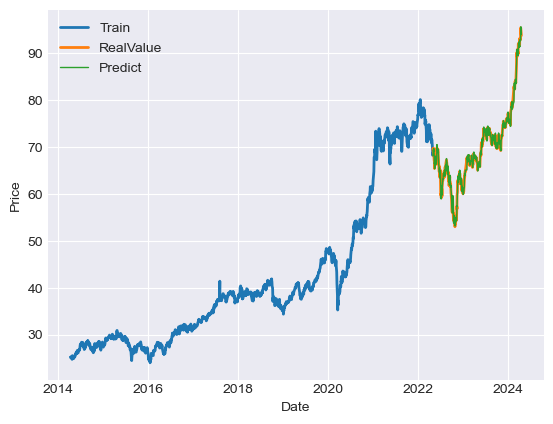

In [25]:
train_df=df[:train_ds_size + MOVING_WIN_SIZE]
test_df=df[train_ds_size+MOVING_WIN_SIZE:]
test_df=test_df.assign(Predict=predicts)

plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(train_df["RealValue"], linewidth=2)
plt.plot(test_df["RealValue"], linewidth=2)
plt.plot(test_df["Predict"], linewidth=1)
plt.legend(("Train", "RealValue", "Predict"))
plt.show()

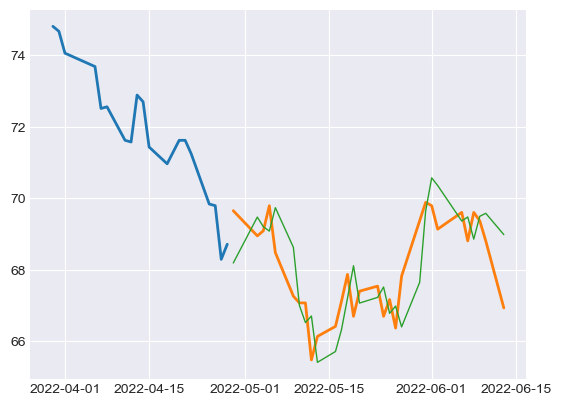

In [34]:
plt.plot(train_df["RealValue"][-20:], linewidth=2)
plt.plot(test_df["RealValue"][:30], linewidth=2)
plt.plot(test_df["Predict"][:30], linewidth=1)
plt.show()

In [22]:
test_df=test_df.assign(Shifted=test_df["RealValue"].shift(1))
test_df.iat[0, -1]=train_df.iat[-1, -1]
test_df

,RealValue,Predict,Shifted
Date,,,
2022-04-29 00:00:00+08:00,69.648285,68.185547,68.710251
2022-05-03 00:00:00+08:00,68.944756,69.470123,69.648285
2022-05-04 00:00:00+08:00,69.085464,69.200050,68.944756
2022-05-05 00:00:00+08:00,69.788986,69.078613,69.085464
2022-05-06 00:00:00+08:00,68.475754,69.733841,69.788986
...,...,...,...
2024-04-09 00:00:00+08:00,95.449997,92.735825,93.099998
2024-04-10 00:00:00+08:00,95.349998,95.439781,95.449997
2024-04-11 00:00:00+08:00,94.949997,95.667358,95.349998


In [23]:
from sklearn.metrics import mean_squared_error

predict_rmse = mean_squared_error(test_df["RealValue"], test_df["Predict"], squared = False)
predict_cvrmse = predict_rmse / test_df["RealValue"].mean() * 100
predict_cvrmse

1.1336793544024477

In [24]:
shifted_rmse = mean_squared_error(test_df["RealValue"], test_df["Shifted"], squared = False)
shifted_cvrmse = shifted_rmse / test_df["RealValue"].mean() * 100
shifted_cvrmse

1.0697869621567542